<a href="https://colab.research.google.com/github/dharapatel2908/Oasis-Internship/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import datetime as dt
import plotly.express as px

In [3]:
data = pd.read_csv("Unemployment in India.csv")

In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(768, 7)

In [8]:
data.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [9]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [17]:
data[' Date'] =pd.to_datetime(data[' Date'])

In [21]:
data['year']=data[' Date'].dt.isocalendar().year
data['month']=data[' Date'].dt.month

<ipython-input-21-21674bc50e02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data[' Date'].dt.isocalendar().year
<ipython-input-21-21674bc50e02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']=data[' Date'].dt.month


In [18]:
data= data.dropna()

In [22]:
data.shape

(740, 9)

In [25]:
data[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [27]:
data=data.drop([' Frequency'],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Estimated Unemployment Rate (%)          740 non-null    float64       
 3    Estimated Employed                       740 non-null    float64       
 4    Estimated Labour Participation Rate (%)  740 non-null    float64       
 5   Area                                      740 non-null    object        
 6   year                                      740 non-null    UInt32        
 7   month                                     740 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 49.9+ KB


<ipython-input-32-6e48a0b1f0c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='plasma')


<Axes: >

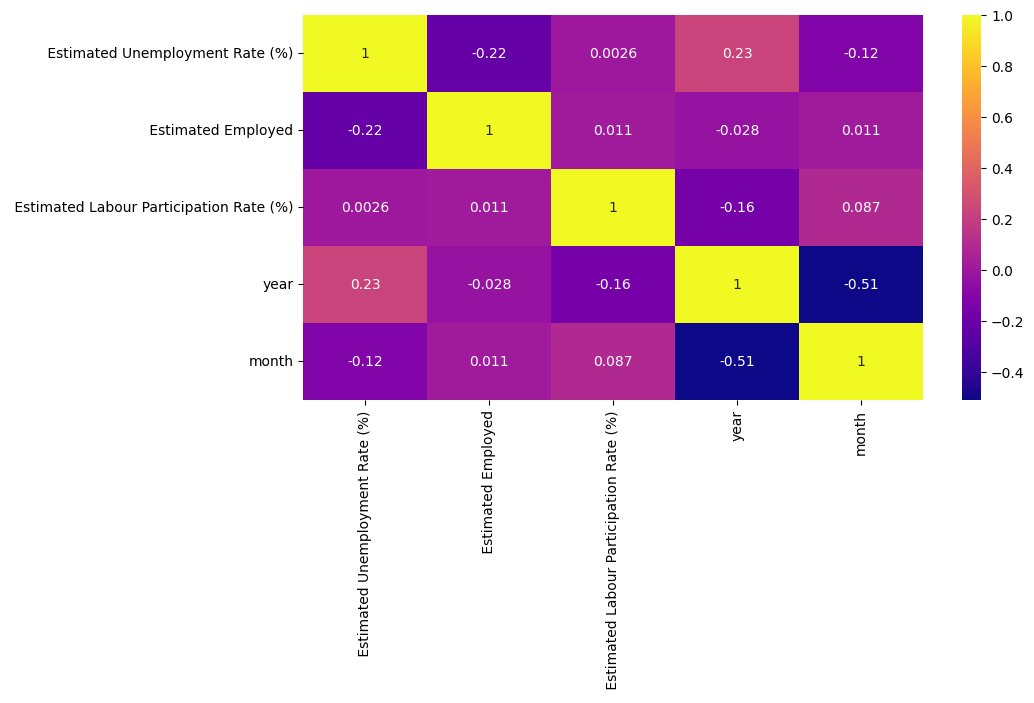

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

In [33]:
count_by_area=data['Area'].value_counts().rename_axis('Area').reset_index(name='Count')
count_by_area.sort_values(by='Count',ascending=False)

,Area,Count
0,Urban,381
1,Rural,359


<Axes: xlabel='Area', ylabel='count'>

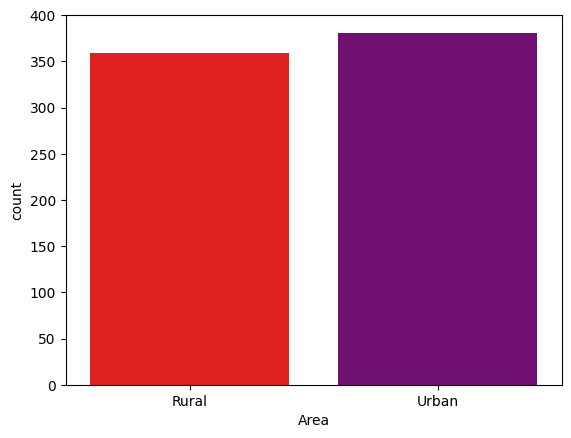

In [37]:
sns.countplot(x='Area',data=data,palette=['red','purple'])

<Axes: xlabel='count', ylabel='Region'>

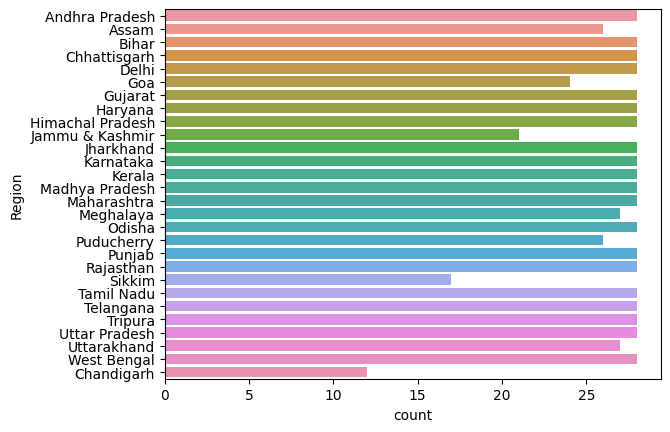

In [38]:
sns.countplot(y='Region',data=data)

In [44]:
data[data[' Estimated Unemployment Rate (%)']>40].Area.value_counts()

Urban    10
Rural     9
Name: Area, dtype: int64

In [45]:
data[data[' Estimated Labour Participation Rate (%)']>50].Region.value_counts()

Tripura             25
Meghalaya           20
Telangana           13
Gujarat             11
Tamil Nadu           5
Sikkim               4
Himachal Pradesh     4
Assam                3
Maharashtra          3
Andhra Pradesh       1
Karnataka            1
West Bengal          1
Name: Region, dtype: int64

In [48]:
data=data.drop(['month'],axis=1)
by_year=data.groupby(['year']).mean().round()
by_year.style.background_gradient(cmap='Blues_r')

<ipython-input-48-fca9dc08c396>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_year=data.groupby(['year']).mean().round()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
year,,,
2019,9.000000,7429385.000000,44.000000
2020,14.000000,6970860.000000,41.000000


In [49]:
data1 =files.upload()

Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [51]:
data1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [54]:
data1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [61]:
import plotly.express as px
unemployment = data1[['Region', 'Region.1', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
unemployment = unemployment.groupby(['Region.1', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemployment, path=['Region.1', 'Region'], values=' Estimated Unemployment Rate (%)', title='Unemployment rate in each State and Region',height=850, color='Region.1',color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.show()